# Customer Satifaction In Airline Industry

# Objective

* Customer satisfaction is always the top priority in all businesses, especially in airline industry. The more satisfied the customers are, the more loyal they will be. The high-grade customer satisfaction is a key to run the business.
* So I Predict whether the customer is Satisfied or Unsatisfied on the basis of various features.

# Logistic Regression

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Data Importing

In [2]:
import pandas as pd
df = pd.read_csv (r"C:\Users\cheta\Desktop\python\Machine learning Practise Projects\Invistico_Airline.csv")

#first few rows
df.head()

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

In [3]:
df = df.rename(columns=lambda x: x.replace(' ', '_'))

In [4]:
df.head()

satisfaction  Gender   Customer_Type  Age   Type_of_Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food_and_drink  ...  Online_support  Ease_of_Online_booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online_boarding  Departure_Delay_in_Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival_Delay_in_Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

# Data Pre-Processing 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Seat_comfort                       129880 non-null  int64  
 8   Departure/Arrival_time_convenient  129880 non-null  int64  
 9   Food_and_drink                     129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Inflight_wifi_service              1298

#### Identifying & Treatment Missing Value

In [6]:
# count the number of NaN values in each column
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Seat_comfort                           0
Departure/Arrival_time_convenient      0
Food_and_drink                         0
Gate_location                          0
Inflight_wifi_service                  0
Inflight_entertainment                 0
Online_support                         0
Ease_of_Online_booking                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Cleanliness                            0
Online_boarding                        0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
dtype: int64

* As we can see there is 393 missing values in column Arrival_Delay_in_Minutes so we will replace them with mean.

#### Replacing Missing value by Mean

In [7]:
df.Arrival_Delay_in_Minutes.fillna(df.Arrival_Delay_in_Minutes.mean(),inplace=True)

In [8]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Seat_comfort                         0
Departure/Arrival_time_convenient    0
Food_and_drink                       0
Gate_location                        0
Inflight_wifi_service                0
Inflight_entertainment               0
Online_support                       0
Ease_of_Online_booking               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Cleanliness                          0
Online_boarding                      0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
dtype: int64

In [9]:
df.head()

satisfaction  Gender   Customer_Type  Age   Type_of_Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food_and_drink  ...  Online_support  Ease_of_Online_booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online_boarding  Departure_Delay_in_Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival_Delay_in_Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

In [10]:
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       129880 non-null  object
 1   Gender                             129880 non-null  object
 2   Customer_Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type_of_Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight_Distance                    129880 non-null  int64 
 7   Seat_comfort                       129880 non-null  int64 
 8   Departure/Arrival_time_convenient  129880 non-null  int64 
 9   Food_and_drink                     129880 non-null  int64 
 10  Gate_location                      129880 non-null  int64 
 11  Inflight_wifi_service              129880 non-null  

In [12]:
df.satisfaction.value_counts(dropna=False)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

<Axes: >

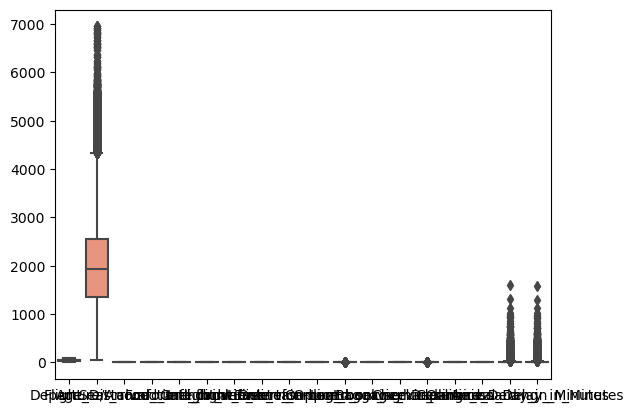

In [13]:
sns.boxplot(data=df)

* As we see there are many outliers present in the dataset so we need to remove them all. So for this we will be using Winsorizing Technique.

## Winsorizing Technique

In [14]:
for i in df:
    if df[i].dtypes in ("float64","int64","int32"):
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        df[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

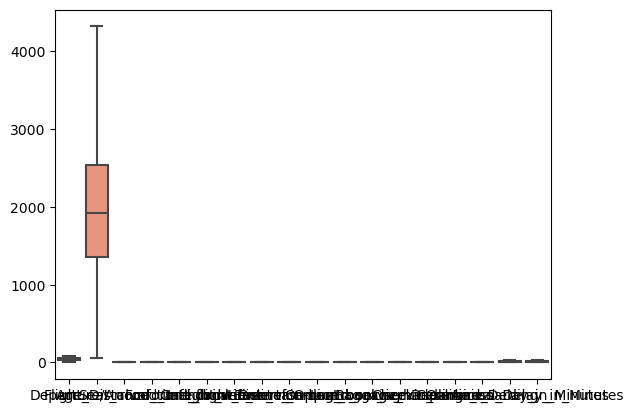

In [15]:
sns.boxplot(data=df)

# Data Visualization

### Bad Rate Analysis 

In [16]:
import plotly.express as px
fig=px.pie(df,values=df["satisfaction"].value_counts(),
           names=["Satisfied","Dissatisfied"],title="<b>Satisfied And Dissatisfied Ratio",
           hole=.6,
       color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")
fig.update_layout(title_font_size=30)
fig.show()

* From above donut chart we derive that from total customers 54.7 % are satisfied and 45.3 % are dissatisfied.

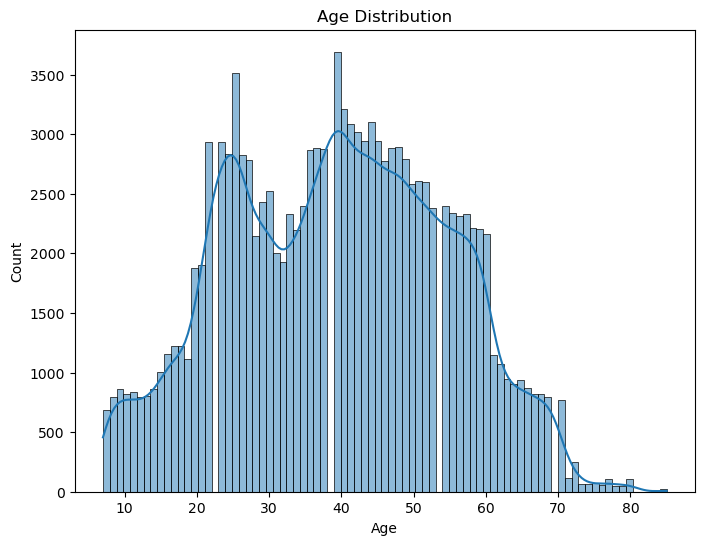

In [17]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True)

# Set the title of the plot
plt.title('Age Distribution')
# Display the plot
plt.show()

* We derive in the above histplot Age Distribution of customers.

### Satisfaction rate with respect to different features

Text(0.5, 1.0, 'Customer Satisfaction by Gender')

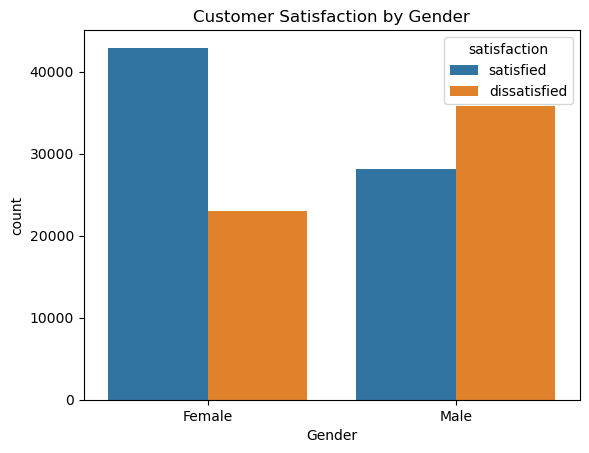

In [18]:
sns.countplot(data=df, x="Gender", hue='satisfaction')
plt.title('Customer Satisfaction by Gender')

* From above countplot we derive that Female customers satisfaction is more than Male customers satifaction. And Male customers are more Dissatisfied than Female.

Text(0.5, 1.0, 'Customer Satisfaction by Customer_Type')

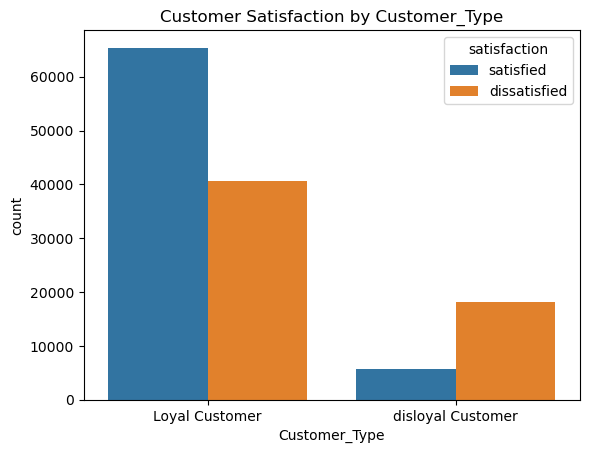

In [19]:
sns.countplot(data=df, x="Customer_Type", hue='satisfaction')
plt.title('Customer Satisfaction by Customer_Type')

* From above countplot we derive that Loyal customers satisfaction is more than Disloyal customers satifaction.

Text(0.5, 1.0, 'Customer Satisfaction by Type_of_Travel')

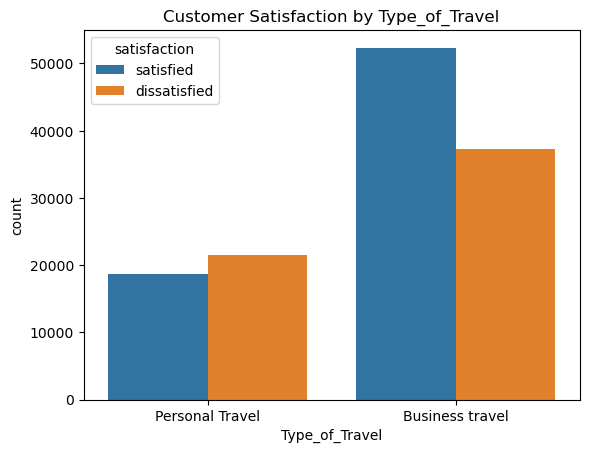

In [20]:
sns.countplot(data=df, x="Type_of_Travel", hue='satisfaction')
plt.title('Customer Satisfaction by Type_of_Travel')

* From above countplot we derive that customer who travel for buisness are more satisfied than customer who travel for personal reasons.

In [21]:
fig=px.histogram(df,x="Class",color="satisfaction",title="<b>Count of satisfied and dissatisfied in each class",
                color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(template="plotly")
fig.update_layout(title_font_size=30)
fig.show()

* From above countplot we derive that Business class customers satisfaction is more than Eco & Eco plus class customers satifaction.
* and mostly customers from Eco class are dissatisfied.

In [22]:
fig1 = px.sunburst(df,path=["Customer_Type","satisfaction"],template="plotly")
fig1.show()

In [23]:
fig2 = px.sunburst(df,path=["Class","satisfaction"],template="plotly_white")
fig2.show()

In [24]:
df_satisfied= df[df["satisfaction"] == "satisfied"]  # 269

df_satisfied

satisfaction  Gender      Customer_Type  Age   Type_of_Travel  \
0         satisfied  Female     Loyal Customer   65  Personal Travel   
1         satisfied    Male     Loyal Customer   47  Personal Travel   
2         satisfied  Female     Loyal Customer   15  Personal Travel   
3         satisfied  Female     Loyal Customer   60  Personal Travel   
4         satisfied  Female     Loyal Customer   70  Personal Travel   
...             ...     ...                ...  ...              ...   
129871    satisfied  Female  disloyal Customer   35  Personal Travel   
129872    satisfied  Female  disloyal Customer   69  Personal Travel   
129873    satisfied  Female  disloyal Customer   63  Personal Travel   
129874    satisfied  Female  disloyal Customer   11  Personal Travel   
129875    satisfied  Female  disloyal Customer   29  Personal Travel   

           Class  Flight_Distance  Seat_comfort  \
0            Eco            265.0             0   
1       Business           2464.0             0   
2            Eco           2138.0             0   
3            Eco            623.0             0   
4            Eco            354.0             0   
...          ...              ...           ...   
129871       Eco           3287.0             5   
129872       Eco           2240.0             5   
129873       Eco           1942.0             5   
129874       Eco           2752.0             5   
129875       Eco           1731.0             5   

        Departure/Arrival_time_convenient  Food_and_drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129871                                  4               5  ...   
129872                                  4               5  ...   
129873                                  5               4  ...   
129874                                  5               5  ...   
129875                                  5               5  ...   

        Online_support  Ease_of_Online_booking  On-board_service  \
0                    2                       3               3.0   
1                    2                       3               4.0   
2                    2                       2               3.0   
3                    3                       1               1.5   
4                    4                       2               2.0   
...                ...                     ...               ...   
129871               2                       2               4.0   
129872               4                       4               5.0   
129873               3                       3               5.0   
129874               2                       2               3.0   
129875               2                       2               3.0   

        Leg_room_service  Baggage_handling  Checkin_service  Cleanliness  \
0                      0                 3              5.0            3   
1                      4                 4              2.0            3   
2                      3                 4              4.0            4   
3                      0                 1              4.0            1   
4                      0                 2              4.0            2   
...                  ...               ...              ...          ...   
129871                 5                 4              4.0            3   
129872                 4                 4              3.0            4   
129873                 2                 5              3.0            5   
129874                 5                 3              5.0            4   
129875                 3                 4              4.0            4   

      

In [25]:
df.select_dtypes(include=[np.number]).columns.tolist()

['Age',
 'Flight_Distance',
 'Seat_comfort',
 'Departure/Arrival_time_convenient',
 'Food_and_drink',
 'Gate_location',
 'Inflight_wifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Online_booking',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

# Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable 

In [26]:
# Qualitative Variable
Quantitative_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

Age  Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
0   65            265.0             0                                  0   
1   47           2464.0             0                                  0   
2   15           2138.0             0                                  0   

   Food_and_drink  Gate_location  Inflight_wifi_service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   

   Inflight_entertainment  Online_support  Ease_of_Online_booking  \
0                       4               2                       3   
1                       2               2                       3   
2                       0               2                       2   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0               3.0                 0                 3              5.0   
1               4.0                 4                 4              2.0   
2               3.0                 3                 4              4.0   

   Cleanliness  Online_boarding  Departure_Delay_in_Minutes  \
0            3                2                           0   
1            3                2                          30   
2            4                2                           0   

   Arrival_Delay_in_Minutes  
0                       0.0  
1                      32.5  
2                       0.0

In [27]:
Qualitative_Variable = df[df.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

satisfaction  Gender   Customer_Type   Type_of_Travel     Class
0    satisfied  Female  Loyal Customer  Personal Travel       Eco
1    satisfied    Male  Loyal Customer  Personal Travel  Business
2    satisfied  Female  Loyal Customer  Personal Travel       Eco

### Converting qualitative Variable into number

In [28]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head() # Satisfied= 0 and Unsatisfied = 1

satisfaction  Gender  Customer_Type  Type_of_Travel  Class
0             1       0              0               1      1
1             1       1              0               1      0
2             1       0              0               1      1
3             1       0              0               1      1
4             1       0              0               1      1

### Combining the data set 

In [29]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

satisfaction  Gender  Customer_Type  Type_of_Travel  Class  Age  \
0             1       0              0               1      1   65   
1             1       1              0               1      0   47   
2             1       0              0               1      1   15   
3             1       0              0               1      1   60   
4             1       0              0               1      1   70   

   Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
0            265.0             0                                  0   
1           2464.0             0                                  0   
2           2138.0             0                                  0   
3            623.0             0                                  0   
4            354.0             0                                  0   

   Food_and_drink  ...  Online_support  Ease_of_Online_booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
0               3.0                 0                 3              5.0   
1               4.0                 4                 4              2.0   
2               3.0                 3                 4              4.0   
3               1.5                 0                 1              4.0   
4               2.0                 0                 2              4.0   

   Cleanliness  Online_boarding  Departure_Delay_in_Minutes  \
0            3                2                           0   
1            3                2                          30   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival_Delay_in_Minutes  
0                       0.0  
1                      32.5  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

# Data Partition 

In [30]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('satisfaction', axis = 1)
Y = Final_combined[['satisfaction']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [31]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
21413       0              0               1      1   65            360.0   
7284        1              0               1      1   13           2991.0   
86080       0              0               0      0   58           1903.0   
59842       0              1               0      0   27           2813.0   
69486       0              0               0      0   34           2864.0   

       Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
21413             4                                  4               4   
7284              1                                  5               1   
86080             3                                  3               3   
59842             4                                  4               4   
69486             3                                  5               4   

       Gate_location  ...  Ease_of_Online_booking  On-board_service  \
21413              4  ...                       5               5.0   
7284               4  ...                       5               4.0   
86080              3  ...                       3               3.0   
59842              3  ...                       3               2.0   
69486              4  ...                       1               1.5   

       Leg_room_service  Baggage_handling  Checkin_service  Cleanliness  \
21413                 5                 5              3.0            5   
7284                  2                 4              3.0            4   
86080                 3                 3              1.5            3   
59842                 4                 3              2.0            4   
69486                 1                 3              4.0            1   

       Online_boarding  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
21413                3                           0                       0.0   
7284                 5                           0                       5.0   
86080                4                           0                       0.0   
59842                3                           0                       0.0   
69486                1                          21                      19.0   

       satisfaction  
21413             1  
7284              0  
86080             0  
59842             0  
69486             0  

[5 rows x 23 columns]

# Model building 

# Hypothesis

* H0 :- There is no log linear relationship between satisfaction and all independent Variable

Vs 

* H1 :- There is log linear relationship between satisfaction and all independent Variable

Alpha = 0.05 (5%)

# Logistics Regression

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model = output

In [33]:
output.intercept_  # beto 

array([-0.19755578])

In [34]:
output.coef_  # Beta 1 -- 

array([[-3.46321806e-01, -4.05305123e-01, -2.15482090e-01,
        -5.95371661e-01, -2.27065451e-02, -4.08063561e-04,
         2.38584132e-01, -2.37088719e-01, -1.99560825e-02,
        -2.38651248e-01, -2.82746421e-01,  7.80486968e-01,
         1.32547678e-01,  2.72017179e-01,  2.12566256e-01,
         1.55877788e-01, -7.43543116e-02,  4.13305602e-02,
        -1.02466269e-01, -5.18772426e-03, -1.89508725e-03,
        -2.15918121e-02]])

In [35]:
output.feature_names_in_

array(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'Age',
       'Flight_Distance', 'Seat_comfort',
       'Departure/Arrival_time_convenient', 'Food_and_drink',
       'Gate_location', 'Inflight_wifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Online_booking', 'On-board_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness', 'Online_boarding', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'], dtype=object)

# Predictions on Train Dataset

In [36]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
21413       0              0               1      1   65            360.0   
7284        1              0               1      1   13           2991.0   
86080       0              0               0      0   58           1903.0   
59842       0              1               0      0   27           2813.0   
69486       0              0               0      0   34           2864.0   

       Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
21413             4                                  4               4   
7284              1                                  5               1   
86080             3                                  3               3   
59842             4                                  4               4   
69486             3                                  5               4   

       Gate_location  ...  Ease_of_Online_booking  On-board_service  \
21413              4  ...                       5               5.0   
7284               4  ...                       5               4.0   
86080              3  ...                       3               3.0   
59842              3  ...                       3               2.0   
69486              4  ...                       1               1.5   

       Leg_room_service  Baggage_handling  Checkin_service  Cleanliness  \
21413                 5                 5              3.0            5   
7284                  2                 4              3.0            4   
86080                 3                 3              1.5            3   
59842                 4                 3              2.0            4   
69486                 1                 3              4.0            1   

       Online_boarding  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
21413                3                           0                       0.0   
7284                 5                           0                       5.0   
86080                4                           0                       0.0   
59842                3                           0                       0.0   
69486                1                          21                      19.0   

       satisfaction  
21413             1  
7284              0  
86080             0  
59842             0  
69486             0  

[5 rows x 23 columns]

In [37]:
train['Predicted']=output.predict(X_train)
train.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
21413       0              0               1      1   65            360.0   
7284        1              0               1      1   13           2991.0   
86080       0              0               0      0   58           1903.0   
59842       0              1               0      0   27           2813.0   
69486       0              0               0      0   34           2864.0   

       Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
21413             4                                  4               4   
7284              1                                  5               1   
86080             3                                  3               3   
59842             4                                  4               4   
69486             3                                  5               4   

       Gate_location  ...  On-board_service  Leg_room_service  \
21413              4  ...               5.0                 5   
7284               4  ...               4.0                 2   
86080              3  ...               3.0                 3   
59842              3  ...               2.0                 4   
69486              4  ...               1.5                 1   

       Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
21413                 5              3.0            5                3   
7284                  4              3.0            4                5   
86080                 3              1.5            3                4   
59842                 3              2.0            4                3   
69486                 3              4.0            1                1   

       Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  \
21413                           0                       0.0             1   
7284                            0                       5.0             0   
86080                           0                       0.0             0   
59842                           0                       0.0             0   
69486                          21                      19.0             0   

       Predicted  
21413          1  
7284           0  
86080          1  
59842          1  
69486          0  

[5 rows x 24 columns]

In [38]:
train['Probability']= output.predict_proba(X_train)[:,1]
train

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
21413        0              0               1      1   65            360.0   
7284         1              0               1      1   13           2991.0   
86080        0              0               0      0   58           1903.0   
59842        0              1               0      0   27           2813.0   
69486        0              0               0      0   34           2864.0   
...        ...            ...             ...    ...  ...              ...   
128106       1              0               0      0   42           1710.0   
103694       0              0               0      1   51           2148.0   
860          1              0               1      1   64           1206.0   
15795        0              0               1      1   22           1193.0   
121958       0              0               0      1   48            245.0   

        Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
21413              4                                  4               4   
7284               1                                  5               1   
86080              3                                  3               3   
59842              4                                  4               4   
69486              3                                  5               4   
...              ...                                ...             ...   
128106             3                                  3               3   
103694             4                                  5               5   
860                1                                  0               1   
15795              3                                  3               3   
121958             5                                  3               3   

        Gate_location  ...  Leg_room_service  Baggage_handling  \
21413               4  ...                 5                 5   
7284                4  ...                 2                 4   
86080               3  ...                 3                 3   
59842               3  ...                 4                 3   
69486               4  ...                 1                 3   
...               ...  ...               ...               ...   
128106              3  ...                 5                 5   
103694              5  ...                 2                 3   
860                 2  ...                 2                 5   
15795               3  ...                 4                 4   
121958              3  ...                 5                 5   

        Checkin_service  Cleanliness  Online_boarding  \
21413               3.0            5                3   
7284                3.0            4                5   
86080               1.5            3                4   
59842               2.0            4                3   
69486               4.0            1                1   
...                 ...          ...              ...   
128106              4.0            5                4   
103694              4.0            4                4   
860                 4.0            4                1   
15795               1.5            4                4   
121958              4.0            5                5   

        Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  \
21413                            0                       0.0             1   
7284                             0                       5.0             0   
86080                            0                       0.0             0   
59842                            0                       0.0             0   
69486                           21                      19.0             0   
...                            ...                       ...           ...   
128106                          30                      32.5             1   
103694                          30                      32.5        

In [39]:
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
21413       0              0               1      1   65            360.0   
7284        1              0               1      1   13           2991.0   
86080       0              0               0      0   58           1903.0   
59842       0              1               0      0   27           2813.0   
69486       0              0               0      0   34           2864.0   

       Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
21413             4                                  4               4   
7284              1                                  5               1   
86080             3                                  3               3   
59842             4                                  4               4   
69486             3                                  5               4   

       Gate_location  ...  Leg_room_service  Baggage_handling  \
21413              4  ...                 5                 5   
7284               4  ...                 2                 4   
86080              3  ...                 3                 3   
59842              3  ...                 4                 3   
69486              4  ...                 1                 3   

       Checkin_service  Cleanliness  Online_boarding  \
21413              3.0            5                3   
7284               3.0            4                5   
86080              1.5            3                4   
59842              2.0            4                3   
69486              4.0            1                1   

       Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  \
21413                           0                       0.0             1   
7284                            0                       5.0             0   
86080                           0                       0.0             0   
59842                           0                       0.0             0   
69486                          21                      19.0             0   

       Predicted  Probability  
21413          0     0.624247  
7284           0     0.049386  
86080          0     0.647520  
59842          0     0.693514  
69486          0     0.230600  

[5 rows x 25 columns]

# Model Performance Metrics

In [40]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['satisfaction'])
matrix

array([[41546, 17183],
       [ 5572, 39603]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79     47118
           1       0.88      0.70      0.78     56786

    accuracy                           0.78    103904
   macro avg       0.79      0.79      0.78    103904
weighted avg       0.80      0.78      0.78    103904



* Accuracy of  Model on train data is 78%, Hence Model is good Fit 
* Accuracy of Unsatisfied Customer Capture by Model is 70% ( Sensitivity )
* Accuracy of Satisfied Customer Capture by Model is 88% (Specificity)

# Predictions on Test Dataset

In [42]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
103044       0              0               0      0   59           1470.0   
43282        0              1               0      1   22           1771.0   
65543        1              0               0      0   55           3657.0   
65083        0              0               0      0   41           1796.0   
76496        1              0               0      1   42           1709.0   

        Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
103044             4                                  4               4   
43282              1                                  1               1   
65543              0                                  5               0   
65083              0                                  4               0   
76496              2                                  3               3   

        Gate_location  ...  Ease_of_Online_booking  On-board_service  \
103044              4  ...                       4               4.0   
43282               4  ...                       4               3.0   
65543               2  ...                       4               4.0   
65083               1  ...                       3               3.0   
76496               3  ...                       2               4.0   

        Leg_room_service  Baggage_handling  Checkin_service  Cleanliness  \
103044                 4                 4              5.0            4   
43282                  4                 3              1.5            4   
65543                  4                 4              3.0            4   
65083                  3                 3              5.0            3   
76496                  4                 4              1.5            3   

        Online_boarding  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
103044                3                           7                       0.0   
43282                 4                           0                       0.0   
65543                 3                          12                       8.0   
65083                 3                           0                       0.0   
76496                 2                           0                       0.0   

        satisfaction  
103044             1  
43282              0  
65543              1  
65083              1  
76496              0  

[5 rows x 23 columns]

In [43]:
test['Predicted']=output.predict(X_test)
test.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
103044       0              0               0      0   59           1470.0   
43282        0              1               0      1   22           1771.0   
65543        1              0               0      0   55           3657.0   
65083        0              0               0      0   41           1796.0   
76496        1              0               0      1   42           1709.0   

        Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
103044             4                                  4               4   
43282              1                                  1               1   
65543              0                                  5               0   
65083              0                                  4               0   
76496              2                                  3               3   

        Gate_location  ...  On-board_service  Leg_room_service  \
103044              4  ...               4.0                 4   
43282               4  ...               3.0                 4   
65543               2  ...               4.0                 4   
65083               1  ...               3.0                 3   
76496               3  ...               4.0                 4   

        Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
103044                 4              5.0            4                3   
43282                  3              1.5            4                4   
65543                  4              3.0            4                3   
65083                  3              5.0            3                3   
76496                  4              1.5            3                2   

        Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  \
103044                           7                       0.0             1   
43282                            0                       0.0             0   
65543                           12                       8.0             1   
65083                            0                       0.0             1   
76496                            0                       0.0             0   

        Predicted  
103044          1  
43282           0  
65543           1  
65083           1  
76496           0  

[5 rows x 24 columns]

# Model Performance Metrics on Test data 

In [44]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['satisfaction'])
print(matrix)

[[ 8385  2099]
 [ 3290 12202]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(test['satisfaction'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76     11675
           1       0.79      0.85      0.82     14301

    accuracy                           0.79     25976
   macro avg       0.79      0.79      0.79     25976
weighted avg       0.79      0.79      0.79     25976



* Accuracy of  Model on test data is 79%, Hence Model is good Fit 
* Accuracy of satisfied Customer Capture by Model is 85% ( Sensitivity )
* Accuracy of unsatisfied Customer Capture by Model is 72% (Specificity)

# Coefficient 

* For future Prediction below 4 variable data is mandatory 

* Note :- If anyone is not present output will not be reliable 

In [46]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

Coefficient
Intercept    -0.197556

In [47]:
abc=pd.DataFrame(output.coef_.T,index=output.feature_names_in_,columns=['Coefficient'])
abc

Coefficient
Gender                               -0.346322
Customer_Type                        -0.405305
Type_of_Travel                       -0.215482
Class                                -0.595372
Age                                  -0.022707
Flight_Distance                      -0.000408
Seat_comfort                          0.238584
Departure/Arrival_time_convenient    -0.237089
Food_and_drink                       -0.019956
Gate_location                        -0.238651
Inflight_wifi_service                -0.282746
Inflight_entertainment                0.780487
Online_support                        0.132548
Ease_of_Online_booking                0.272017
On-board_service                      0.212566
Leg_room_service                      0.155878
Baggage_handling                     -0.074354
Checkin_service                       0.041331
Cleanliness                          -0.102466
Online_boarding                      -0.005188
Departure_Delay_in_Minutes           -0.001895
Arrival_Delay_in_Minutes             -0.021592

In [48]:
Model_Values.append(abc)

Coefficient
Intercept                            -0.197556
Gender                               -0.346322
Customer_Type                        -0.405305
Type_of_Travel                       -0.215482
Class                                -0.595372
Age                                  -0.022707
Flight_Distance                      -0.000408
Seat_comfort                          0.238584
Departure/Arrival_time_convenient    -0.237089
Food_and_drink                       -0.019956
Gate_location                        -0.238651
Inflight_wifi_service                -0.282746
Inflight_entertainment                0.780487
Online_support                        0.132548
Ease_of_Online_booking                0.272017
On-board_service                      0.212566
Leg_room_service                      0.155878
Baggage_handling                     -0.074354
Checkin_service                       0.041331
Cleanliness                          -0.102466
Online_boarding                      -0.005188
Departure_Delay_in_Minutes           -0.001895
Arrival_Delay_in_Minutes             -0.021592

# ROCR Plot

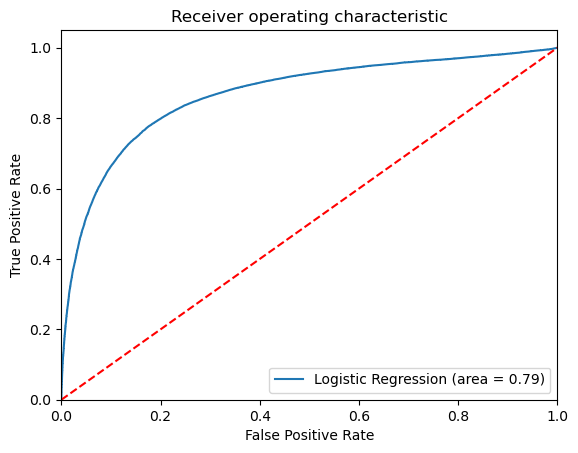

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train))
fpr, tpr, thresholds= roc_curve(y_train, output.predict_proba(X_train)
                                 [:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Finish

# Decision tree

# Model Building

In [50]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Plotting the Tree

In [51]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

satisfaction  Gender  Customer_Type  Type_of_Travel  Class  Age  \
21413             1       0              0               1      1   65   
7284              0       1              0               1      1   13   
86080             0       0              0               0      0   58   
59842             0       0              1               0      0   27   
69486             0       0              0               0      0   34   

       Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
21413            360.0             4                                  4   
7284            2991.0             1                                  5   
86080           1903.0             3                                  3   
59842           2813.0             4                                  4   
69486           2864.0             3                                  5   

       Food_and_drink  ...  Online_support  Ease_of_Online_booking  \
21413               4  ...               4                       5   
7284                1  ...               5                       5   
86080               3  ...               4                       3   
59842               4  ...               3                       3   
69486               4  ...               4                       1   

       On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
21413               5.0                 5                 5              3.0   
7284                4.0                 2                 4              3.0   
86080               3.0                 3                 3              1.5   
59842               2.0                 4                 3              2.0   
69486               1.5                 1                 3              4.0   

       Cleanliness  Online_boarding  Departure_Delay_in_Minutes  \
21413            5                3                           0   
7284             4                5                           0   
86080            3                4                           0   
59842            4                3                           0   
69486            1                1                          21   

       Arrival_Delay_in_Minutes  
21413                       0.0  
7284                        5.0  
86080                       0.0  
59842                       0.0  
69486                      19.0  

[5 rows x 23 columns]

In [52]:
independent_variable = list(train.columns[1:])
independent_variable

['Gender',
 'Customer_Type',
 'Type_of_Travel',
 'Class',
 'Age',
 'Flight_Distance',
 'Seat_comfort',
 'Departure/Arrival_time_convenient',
 'Food_and_drink',
 'Gate_location',
 'Inflight_wifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Online_booking',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

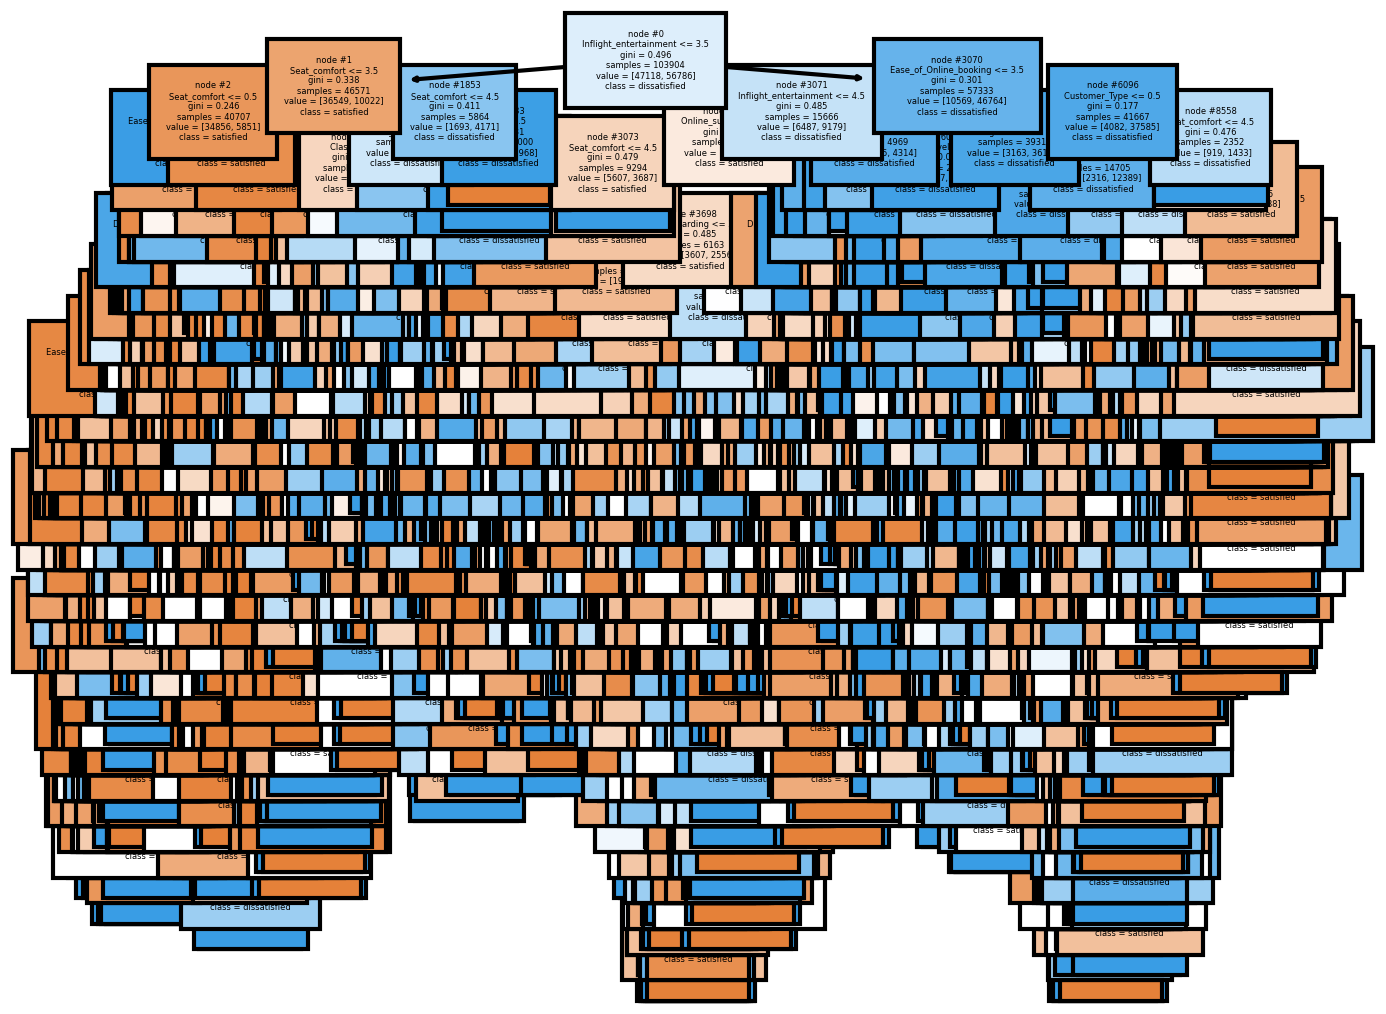

In [53]:
from sklearn import tree
import matplotlib.pyplot as plt

satisfaction=['satisfied', 'dissatisfied']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=satisfaction, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

# Predictions on Train Dataset

In [54]:
train.head()

satisfaction  Gender  Customer_Type  Type_of_Travel  Class  Age  \
21413             1       0              0               1      1   65   
7284              0       1              0               1      1   13   
86080             0       0              0               0      0   58   
59842             0       0              1               0      0   27   
69486             0       0              0               0      0   34   

       Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
21413            360.0             4                                  4   
7284            2991.0             1                                  5   
86080           1903.0             3                                  3   
59842           2813.0             4                                  4   
69486           2864.0             3                                  5   

       Food_and_drink  ...  Online_support  Ease_of_Online_booking  \
21413               4  ...               4                       5   
7284                1  ...               5                       5   
86080               3  ...               4                       3   
59842               4  ...               3                       3   
69486               4  ...               4                       1   

       On-board_service  Leg_room_service  Baggage_handling  Checkin_service  \
21413               5.0                 5                 5              3.0   
7284                4.0                 2                 4              3.0   
86080               3.0                 3                 3              1.5   
59842               2.0                 4                 3              2.0   
69486               1.5                 1                 3              4.0   

       Cleanliness  Online_boarding  Departure_Delay_in_Minutes  \
21413            5                3                           0   
7284             4                5                           0   
86080            3                4                           0   
59842            4                3                           0   
69486            1                1                          21   

       Arrival_Delay_in_Minutes  
21413                       0.0  
7284                        5.0  
86080                       0.0  
59842                       0.0  
69486                      19.0  

[5 rows x 23 columns]

In [55]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

satisfaction  Gender  Customer_Type  Type_of_Travel  Class  Age  \
21413             1       0              0               1      1   65   
7284              0       1              0               1      1   13   
86080             0       0              0               0      0   58   
59842             0       0              1               0      0   27   
69486             0       0              0               0      0   34   

       Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
21413            360.0             4                                  4   
7284            2991.0             1                                  5   
86080           1903.0             3                                  3   
59842           2813.0             4                                  4   
69486           2864.0             3                                  5   

       Food_and_drink  ...  Ease_of_Online_booking  On-board_service  \
21413               4  ...                       5               5.0   
7284                1  ...                       5               4.0   
86080               3  ...                       3               3.0   
59842               4  ...                       3               2.0   
69486               4  ...                       1               1.5   

       Leg_room_service  Baggage_handling  Checkin_service  Cleanliness  \
21413                 5                 5              3.0            5   
7284                  2                 4              3.0            4   
86080                 3                 3              1.5            3   
59842                 4                 3              2.0            4   
69486                 1                 3              4.0            1   

       Online_boarding  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
21413                3                           0                       0.0   
7284                 5                           0                       5.0   
86080                4                           0                       0.0   
59842                3                           0                       0.0   
69486                1                          21                      19.0   

       Predicted  
21413          1  
7284           0  
86080          0  
59842          0  
69486          0  

[5 rows x 24 columns]

# Model Performance Metrics

In [56]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['satisfaction'])
print(matrix)

[[47118     0]
 [    0 56786]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47118
           1       1.00      1.00      1.00     56786

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



### Model Improvement by Pruning Method ( Cut Tree)

In [58]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=60, ## child
                                 min_samples_split=300, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=60, min_samples_split=300)

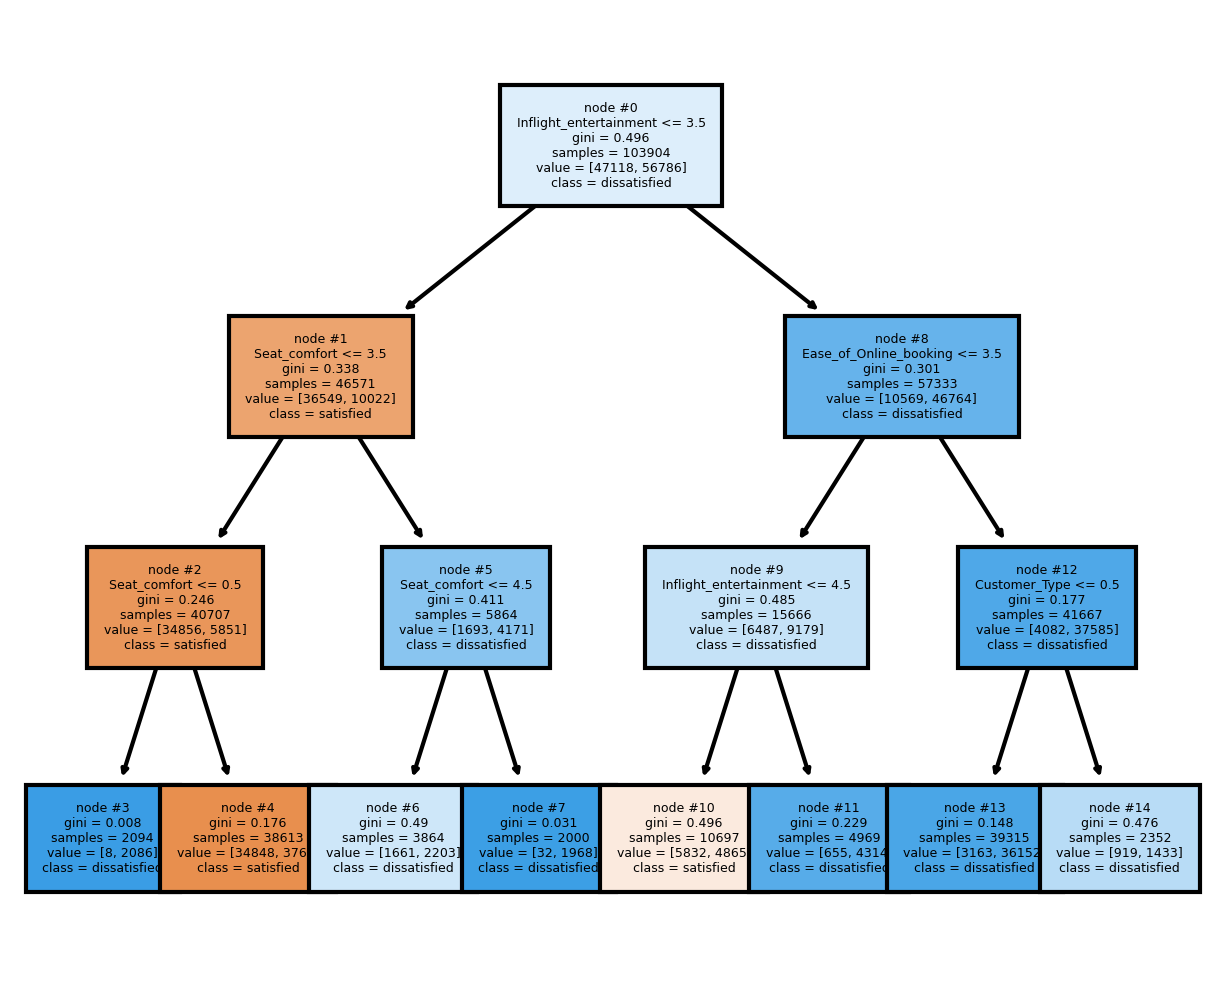

In [59]:
from sklearn import tree
import matplotlib.pyplot as plt

satisfaction=['satisfied', 'dissatisfied']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = satisfaction, # Yes , No
               filled = True, # colour
              node_ids = True, # node number
              fontsize = 3); # 
#fig.savefig('imagename.png')

In [60]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

satisfaction  Gender  Customer_Type  Type_of_Travel  Class  Age  \
21413             1       0              0               1      1   65   
7284              0       1              0               1      1   13   
86080             0       0              0               0      0   58   
59842             0       0              1               0      0   27   
69486             0       0              0               0      0   34   

       Flight_Distance  Seat_comfort  Departure/Arrival_time_convenient  \
21413            360.0             4                                  4   
7284            2991.0             1                                  5   
86080           1903.0             3                                  3   
59842           2813.0             4                                  4   
69486           2864.0             3                                  5   

       Food_and_drink  ...  Ease_of_Online_booking  On-board_service  \
21413               4  ...                       5               5.0   
7284                1  ...                       5               4.0   
86080               3  ...                       3               3.0   
59842               4  ...                       3               2.0   
69486               4  ...                       1               1.5   

       Leg_room_service  Baggage_handling  Checkin_service  Cleanliness  \
21413                 5                 5              3.0            5   
7284                  2                 4              3.0            4   
86080                 3                 3              1.5            3   
59842                 4                 3              2.0            4   
69486                 1                 3              4.0            1   

       Online_boarding  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
21413                3                           0                       0.0   
7284                 5                           0                       5.0   
86080                4                           0                       0.0   
59842                3                           0                       0.0   
69486                1                          21                      19.0   

       Predicted  
21413          1  
7284           0  
86080          0  
59842          0  
69486          0  

[5 rows x 24 columns]

### Final accuracy of Model after Pruning

In [61]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['satisfaction'])
print(matrix)

[[40680  8630]
 [ 6438 48156]]


In [62]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     47118
           1       0.88      0.85      0.86     56786

    accuracy                           0.85    103904
   macro avg       0.85      0.86      0.85    103904
weighted avg       0.86      0.85      0.86    103904



# Predictions on Test Dataset

In [63]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
103044       0              0               0      0   59           1470.0   
43282        0              1               0      1   22           1771.0   
65543        1              0               0      0   55           3657.0   
65083        0              0               0      0   41           1796.0   
76496        1              0               0      1   42           1709.0   

        Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
103044             4                                  4               4   
43282              1                                  1               1   
65543              0                                  5               0   
65083              0                                  4               0   
76496              2                                  3               3   

        Gate_location  ...  Ease_of_Online_booking  On-board_service  \
103044              4  ...                       4               4.0   
43282               4  ...                       4               3.0   
65543               2  ...                       4               4.0   
65083               1  ...                       3               3.0   
76496               3  ...                       2               4.0   

        Leg_room_service  Baggage_handling  Checkin_service  Cleanliness  \
103044                 4                 4              5.0            4   
43282                  4                 3              1.5            4   
65543                  4                 4              3.0            4   
65083                  3                 3              5.0            3   
76496                  4                 4              1.5            3   

        Online_boarding  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
103044                3                           7                       0.0   
43282                 4                           0                       0.0   
65543                 3                          12                       8.0   
65083                 3                           0                       0.0   
76496                 2                           0                       0.0   

        satisfaction  
103044             1  
43282              0  
65543              1  
65083              1  
76496              0  

[5 rows x 23 columns]

In [64]:
test['Predicted']=dt.predict(X_test)
test.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
103044       0              0               0      0   59           1470.0   
43282        0              1               0      1   22           1771.0   
65543        1              0               0      0   55           3657.0   
65083        0              0               0      0   41           1796.0   
76496        1              0               0      1   42           1709.0   

        Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
103044             4                                  4               4   
43282              1                                  1               1   
65543              0                                  5               0   
65083              0                                  4               0   
76496              2                                  3               3   

        Gate_location  ...  On-board_service  Leg_room_service  \
103044              4  ...               4.0                 4   
43282               4  ...               3.0                 4   
65543               2  ...               4.0                 4   
65083               1  ...               3.0                 3   
76496               3  ...               4.0                 4   

        Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
103044                 4              5.0            4                3   
43282                  3              1.5            4                4   
65543                  4              3.0            4                3   
65083                  3              5.0            3                3   
76496                  4              1.5            3                2   

        Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  \
103044                           7                       0.0             1   
43282                            0                       0.0             0   
65543                           12                       8.0             1   
65083                            0                       0.0             1   
76496                            0                       0.0             0   

        Predicted  
103044          1  
43282           0  
65543           1  
65083           0  
76496           0  

[5 rows x 24 columns]

# Sensitivity & Specificity

### Train

In [65]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     47118
           1       0.88      0.85      0.86     56786

    accuracy                           0.85    103904
   macro avg       0.85      0.86      0.85    103904
weighted avg       0.86      0.85      0.86    103904



### Test

In [66]:
from sklearn.metrics import classification_report
print(classification_report(test['satisfaction'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     11675
           1       0.88      0.85      0.86     14301

    accuracy                           0.85     25976
   macro avg       0.85      0.85      0.85     25976
weighted avg       0.86      0.85      0.85     25976



# Grid Search Method

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [300,150,250], ## Parent 
           'min_samples_leaf': [50,60,70], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [300, 150, 250]},
             verbose=1)

In [68]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=300,
                       random_state=42)

# Finish

# Random Forest

In [69]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# Model Building

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=3,  # each tree will have 4 branches
                               min_samples_split=300,# each tree will have parent node
                               min_samples_leaf=60,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=60, min_samples_split=300,
                       n_estimators=20)

# Importance Features

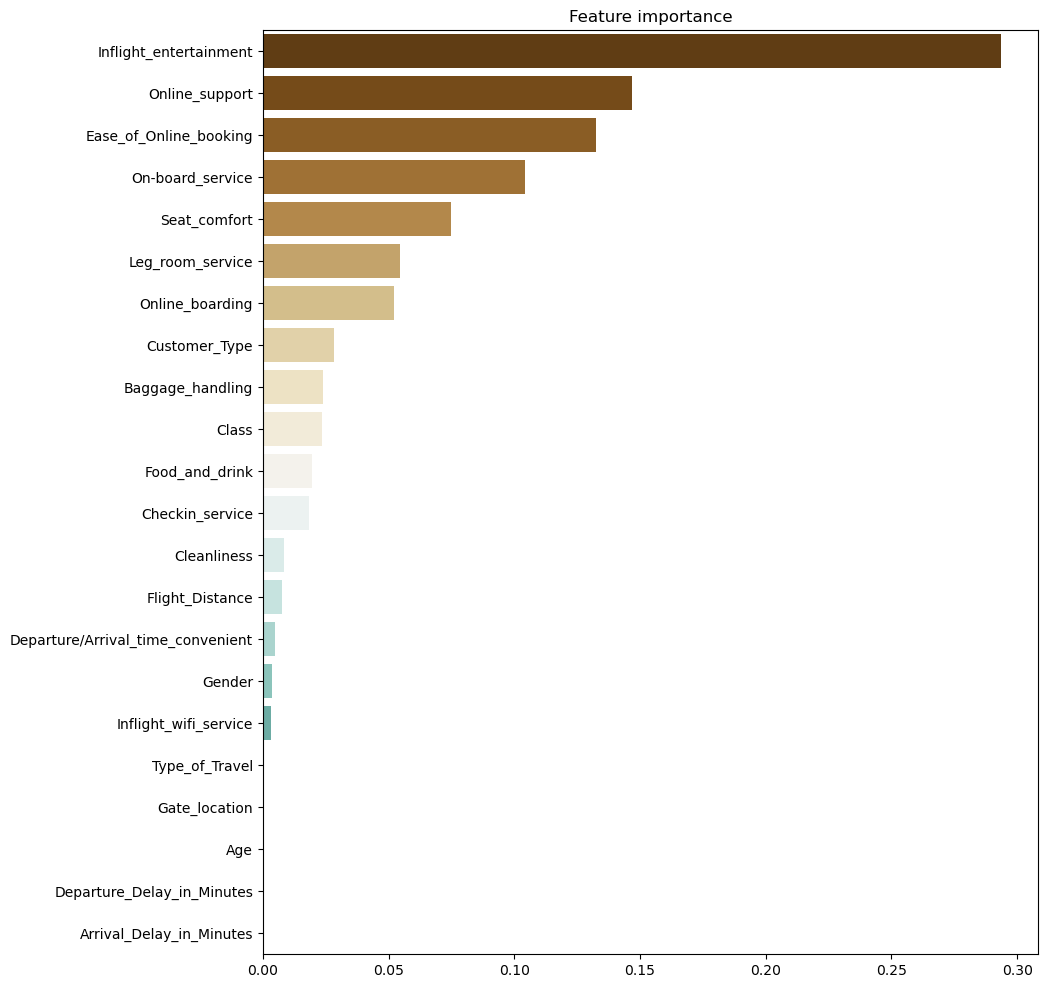

In [71]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

# Random Forest Visualization

In [72]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [73]:
list(X.columns)

['Gender',
 'Customer_Type',
 'Type_of_Travel',
 'Class',
 'Age',
 'Flight_Distance',
 'Seat_comfort',
 'Departure/Arrival_time_convenient',
 'Food_and_drink',
 'Gate_location',
 'Inflight_wifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Online_booking',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

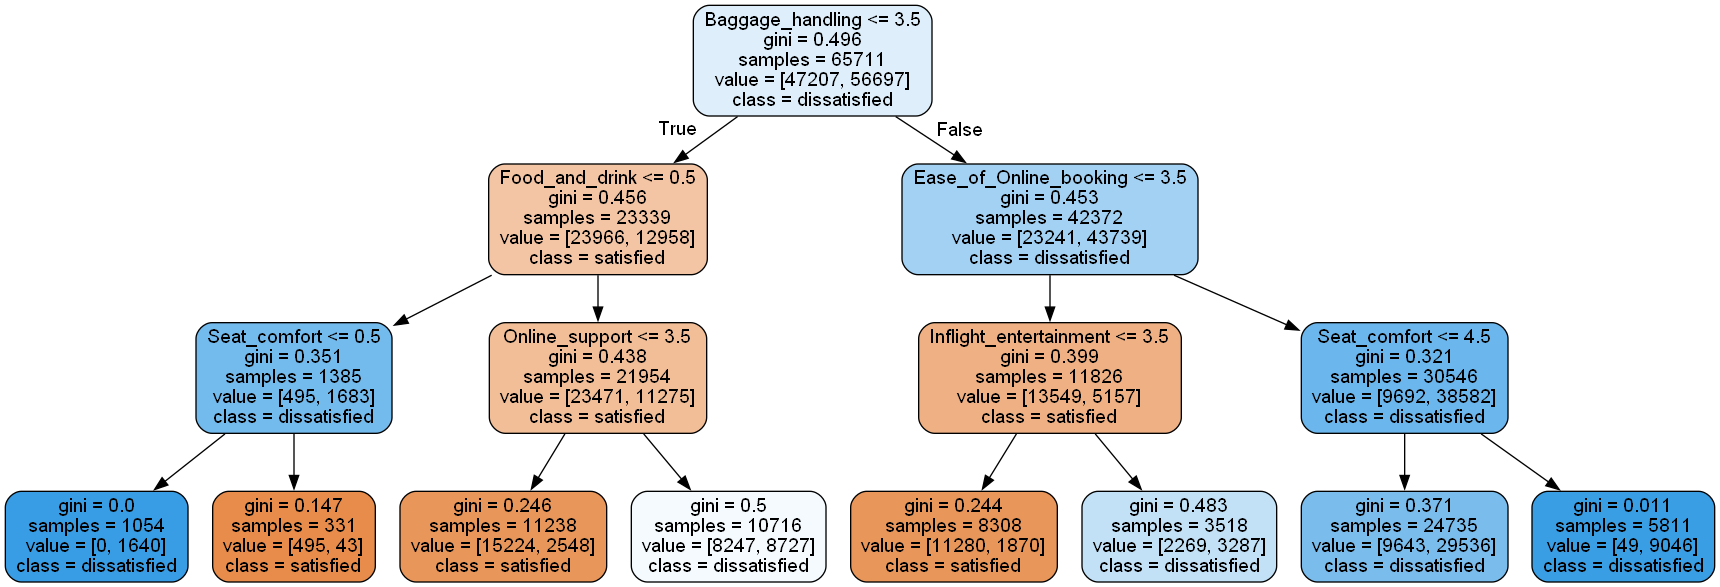

In [74]:
tree = Model.estimators_[19]  # specify the tree number   
satisfaction=['satisfied', 'dissatisfied']
feature_list = list(X.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=satisfaction,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Predictions on Train Dataset

In [75]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
21413       0              0               1      1   65            360.0   
7284        1              0               1      1   13           2991.0   
86080       0              0               0      0   58           1903.0   
59842       0              1               0      0   27           2813.0   
69486       0              0               0      0   34           2864.0   

       Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
21413             4                                  4               4   
7284              1                                  5               1   
86080             3                                  3               3   
59842             4                                  4               4   
69486             3                                  5               4   

       Gate_location  ...  Ease_of_Online_booking  On-board_service  \
21413              4  ...                       5               5.0   
7284               4  ...                       5               4.0   
86080              3  ...                       3               3.0   
59842              3  ...                       3               2.0   
69486              4  ...                       1               1.5   

       Leg_room_service  Baggage_handling  Checkin_service  Cleanliness  \
21413                 5                 5              3.0            5   
7284                  2                 4              3.0            4   
86080                 3                 3              1.5            3   
59842                 4                 3              2.0            4   
69486                 1                 3              4.0            1   

       Online_boarding  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
21413                3                           0                       0.0   
7284                 5                           0                       5.0   
86080                4                           0                       0.0   
59842                3                           0                       0.0   
69486                1                          21                      19.0   

       satisfaction  
21413             1  
7284              0  
86080             0  
59842             0  
69486             0  

[5 rows x 23 columns]

In [76]:
train['Predicted']=Model.predict(X_train)
train.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
21413       0              0               1      1   65            360.0   
7284        1              0               1      1   13           2991.0   
86080       0              0               0      0   58           1903.0   
59842       0              1               0      0   27           2813.0   
69486       0              0               0      0   34           2864.0   

       Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
21413             4                                  4               4   
7284              1                                  5               1   
86080             3                                  3               3   
59842             4                                  4               4   
69486             3                                  5               4   

       Gate_location  ...  On-board_service  Leg_room_service  \
21413              4  ...               5.0                 5   
7284               4  ...               4.0                 2   
86080              3  ...               3.0                 3   
59842              3  ...               2.0                 4   
69486              4  ...               1.5                 1   

       Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
21413                 5              3.0            5                3   
7284                  4              3.0            4                5   
86080                 3              1.5            3                4   
59842                 3              2.0            4                3   
69486                 3              4.0            1                1   

       Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  \
21413                           0                       0.0             1   
7284                            0                       5.0             0   
86080                           0                       0.0             0   
59842                           0                       0.0             0   
69486                          21                      19.0             0   

       Predicted  
21413          1  
7284           0  
86080          1  
59842          0  
69486          0  

[5 rows x 24 columns]

# Model Performance Metrics

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['satisfaction'], train['Predicted'])
print(confusion_matrix)

[[39221  7897]
 [ 6705 50081]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(train['satisfaction'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     47118
           1       0.86      0.88      0.87     56786

    accuracy                           0.86    103904
   macro avg       0.86      0.86      0.86    103904
weighted avg       0.86      0.86      0.86    103904



# Predictions on Test Dataset

In [79]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
103044       0              0               0      0   59           1470.0   
43282        0              1               0      1   22           1771.0   
65543        1              0               0      0   55           3657.0   
65083        0              0               0      0   41           1796.0   
76496        1              0               0      1   42           1709.0   

        Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
103044             4                                  4               4   
43282              1                                  1               1   
65543              0                                  5               0   
65083              0                                  4               0   
76496              2                                  3               3   

        Gate_location  ...  Ease_of_Online_booking  On-board_service  \
103044              4  ...                       4               4.0   
43282               4  ...                       4               3.0   
65543               2  ...                       4               4.0   
65083               1  ...                       3               3.0   
76496               3  ...                       2               4.0   

        Leg_room_service  Baggage_handling  Checkin_service  Cleanliness  \
103044                 4                 4              5.0            4   
43282                  4                 3              1.5            4   
65543                  4                 4              3.0            4   
65083                  3                 3              5.0            3   
76496                  4                 4              1.5            3   

        Online_boarding  Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  \
103044                3                           7                       0.0   
43282                 4                           0                       0.0   
65543                 3                          12                       8.0   
65083                 3                           0                       0.0   
76496                 2                           0                       0.0   

        satisfaction  
103044             1  
43282              0  
65543              1  
65083              1  
76496              0  

[5 rows x 23 columns]

In [80]:
test['Predicted']=Model.predict(X_test)
test.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
103044       0              0               0      0   59           1470.0   
43282        0              1               0      1   22           1771.0   
65543        1              0               0      0   55           3657.0   
65083        0              0               0      0   41           1796.0   
76496        1              0               0      1   42           1709.0   

        Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
103044             4                                  4               4   
43282              1                                  1               1   
65543              0                                  5               0   
65083              0                                  4               0   
76496              2                                  3               3   

        Gate_location  ...  On-board_service  Leg_room_service  \
103044              4  ...               4.0                 4   
43282               4  ...               3.0                 4   
65543               2  ...               4.0                 4   
65083               1  ...               3.0                 3   
76496               3  ...               4.0                 4   

        Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
103044                 4              5.0            4                3   
43282                  3              1.5            4                4   
65543                  4              3.0            4                3   
65083                  3              5.0            3                3   
76496                  4              1.5            3                2   

        Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  \
103044                           7                       0.0             1   
43282                            0                       0.0             0   
65543                           12                       8.0             1   
65083                            0                       0.0             1   
76496                            0                       0.0             0   

        Predicted  
103044          1  
43282           0  
65543           1  
65083           1  
76496           0  

[5 rows x 24 columns]

# Model Performance Metrics on Test data

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['satisfaction'])
print(confusion_matrix)

[[ 9735  1619]
 [ 1940 12682]]


In [82]:
from sklearn.metrics import classification_report
print(classification_report(test['satisfaction'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85     11675
           1       0.87      0.89      0.88     14301

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976



# Finish

# Gradient boosting

In [83]:
####################  Data Analysis & Calculation  #####################
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 

In [84]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2,3],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,300], ## child
                    'min_samples_split':[50,70,80]} #parent 

In [85]:
# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier()
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3],
                         'min_samples_leaf': [100, 200, 300],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [86]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 3, 'min_samples_leaf': 300, 'min_samples_split': 50, 'n_estimators': 5}


In [87]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=300,
                           min_samples_split=50, n_estimators=5)

In [88]:
# Prediction
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [89]:
train_pred

array([1, 0, 0, ..., 0, 0, 1])

# Confusion Matrix Train Data (2 Model)

In [90]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     47118
           1       0.90      0.92      0.91     56786

    accuracy                           0.90    103904
   macro avg       0.90      0.89      0.90    103904
weighted avg       0.90      0.90      0.90    103904



# Confusion Matrix Test Data (2 Model)

In [91]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89     11675
           1       0.90      0.92      0.91     14301

    accuracy                           0.90     25976
   macro avg       0.90      0.90      0.90     25976
weighted avg       0.90      0.90      0.90     25976



# Importance Feature

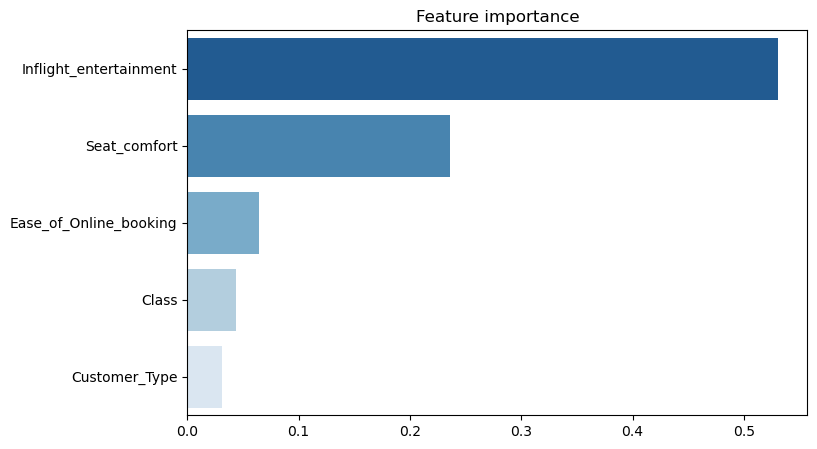

In [92]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=final_mod_GBM.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

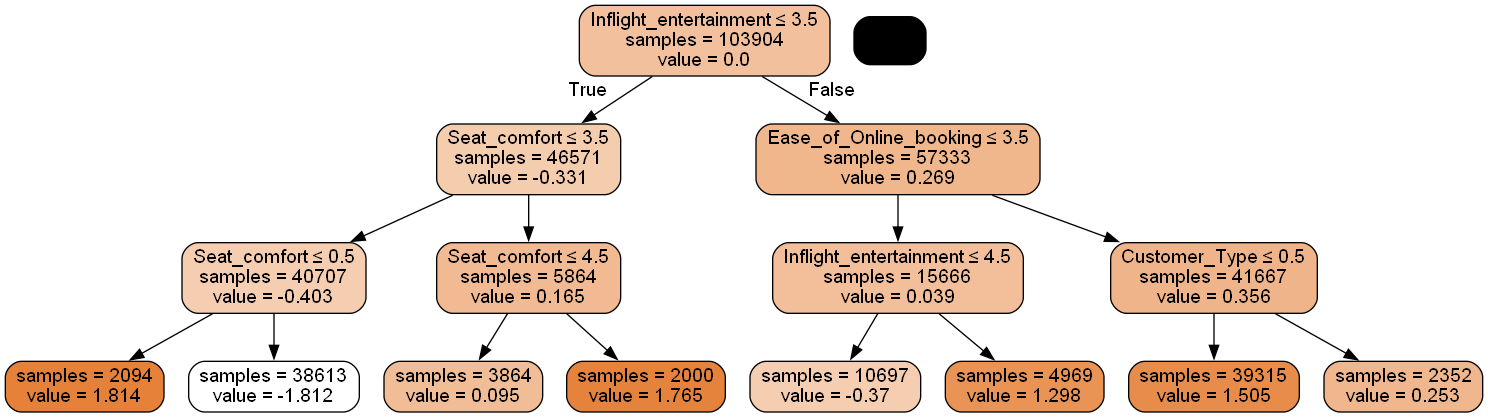

In [93]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[0, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
target=['1','0']
feature_list = list(X.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=target,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

# Finish

# Extreme Boosting

In [94]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import plot_importance ## Plotting Importance Variables 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder # Labeling the columns with 0 & 1

# Model -- Xg Boosting

In [95]:
model_parameters = {'n_estimators': [10, 20], # number of tress
                    'max_depth':    [2,3],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent 

In [96]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)  ## Model building

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3],
                         'n_estimators': [10, 20], 'reg_lambda': [0, 1]},
             scoring='accuracy', verbose=1)

In [97]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 3, 'n_estimators': 20, 'reg_lambda': 0}


In [98]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [99]:
final_mod.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.8,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': 0,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [100]:
parent_node = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_node = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

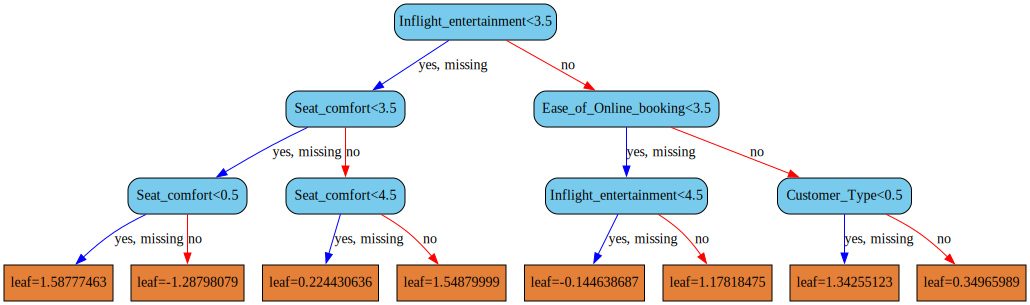

In [101]:
xgb.to_graphviz(final_mod,num_trees=0,size="5,5",   # Tree = 10 
               condition_node_params=parent_node,
               leaf_node_params=child_node)

# Accuracy of Train

In [102]:
train=pd.concat([X_train,y_train],axis=1)
train['Predicted']=final_mod.predict(X_train)  # MODEL = Final_mod
train.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
21413       0              0               1      1   65            360.0   
7284        1              0               1      1   13           2991.0   
86080       0              0               0      0   58           1903.0   
59842       0              1               0      0   27           2813.0   
69486       0              0               0      0   34           2864.0   

       Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
21413             4                                  4               4   
7284              1                                  5               1   
86080             3                                  3               3   
59842             4                                  4               4   
69486             3                                  5               4   

       Gate_location  ...  On-board_service  Leg_room_service  \
21413              4  ...               5.0                 5   
7284               4  ...               4.0                 2   
86080              3  ...               3.0                 3   
59842              3  ...               2.0                 4   
69486              4  ...               1.5                 1   

       Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
21413                 5              3.0            5                3   
7284                  4              3.0            4                5   
86080                 3              1.5            3                4   
59842                 3              2.0            4                3   
69486                 3              4.0            1                1   

       Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  \
21413                           0                       0.0             1   
7284                            0                       5.0             0   
86080                           0                       0.0             0   
59842                           0                       0.0             0   
69486                          21                      19.0             0   

       Predicted  
21413          1  
7284           0  
86080          0  
59842          0  
69486          0  

[5 rows x 24 columns]

In [103]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     47118
           1       0.94      0.93      0.94     56786

    accuracy                           0.93    103904
   macro avg       0.93      0.93      0.93    103904
weighted avg       0.93      0.93      0.93    103904



# Accuracy of Test

In [104]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=final_mod.predict(X_test)  # MODEL = Final_mod
test.head()

Gender  Customer_Type  Type_of_Travel  Class  Age  Flight_Distance  \
103044       0              0               0      0   59           1470.0   
43282        0              1               0      1   22           1771.0   
65543        1              0               0      0   55           3657.0   
65083        0              0               0      0   41           1796.0   
76496        1              0               0      1   42           1709.0   

        Seat_comfort  Departure/Arrival_time_convenient  Food_and_drink  \
103044             4                                  4               4   
43282              1                                  1               1   
65543              0                                  5               0   
65083              0                                  4               0   
76496              2                                  3               3   

        Gate_location  ...  On-board_service  Leg_room_service  \
103044              4  ...               4.0                 4   
43282               4  ...               3.0                 4   
65543               2  ...               4.0                 4   
65083               1  ...               3.0                 3   
76496               3  ...               4.0                 4   

        Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
103044                 4              5.0            4                3   
43282                  3              1.5            4                4   
65543                  4              3.0            4                3   
65083                  3              5.0            3                3   
76496                  4              1.5            3                2   

        Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  \
103044                           7                       0.0             1   
43282                            0                       0.0             0   
65543                           12                       8.0             1   
65083                            0                       0.0             1   
76496                            0                       0.0             0   

        Predicted  
103044          1  
43282           0  
65543           1  
65083           1  
76496           0  

[5 rows x 24 columns]

In [105]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     11675
           1       0.94      0.93      0.94     14301

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



# Finish

## 1.Logistic Regression
* Accuracy of Train data = 78 %
* Accuracy of Test data = 79 %
## 2.Decision Tree
* Accuracy of Train data = 85 %
* Accuracy of Test data = 85 %
## 3.Random Forest
* Accuracy of Train data = 86 %
* Accuracy of Test data = 86 %
## 4.Gradient Boosting
* Accuracy of Train data = 90 %
* Accuracy of Test data = 90 %
## 5.Extreme Boosting
* Accuracy of Train data = 93 %
* Accuracy of Test data = 93 %

# Conclusion

* In conclusion, this notebook provides valuable insights into customer satisfaction in the airline industry. Factors such as inflight entertainment, seat comfort, ease of online booking, and online support have a significant impact on satisfaction levels.

* The Extreme Boosting classifier model demonstrated good performance, indicating its potential for predicting customer satisfaction.

* By implementing these suggestions and by using the findings from this analysis, airlines can optimize customer satisfaction, loyalty, and ultimately drive business success.